In [269]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [270]:
train_df = pd.read_csv("/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")
train_df.head(10)
train = train_df.copy()

In [271]:
summary = pd.DataFrame(train_df.dtypes)
summary["null"] = train_df.isnull().sum()
summary["unique"] = train_df.nunique()
summary["first"] = train_df.loc[0]
summary["second"] = train_df.loc[1]
summary["third"] = train_df.loc[2]
summary

,0,null,unique,first,second,third
Name,object,0,351,10-Day Green Smoothie Cleanse,11/22/63: A Novel,12 Rules for Life: An Antidote to Chaos
Author,object,0,248,JJ Smith,Stephen King,Jordan B. Peterson
User Rating,float64,0,14,4.7,4.6,4.7
Reviews,int64,0,346,17350,2052,18979
Price,int64,0,40,8,22,15
Year,int64,0,11,2016,2011,2018
Genre,object,0,2,Non Fiction,Fiction,Non Fiction


In [272]:
train_df["Genre"] = train_df["Genre"].astype("category")
print(train_df["Genre"].cat.categories,train_df["Genre"].cat.codes)
train_df["Genre"] = train_df["Genre"].cat.codes
train_df.columns

Index(['Fiction', 'Non Fiction'], dtype='object') 0      1
1      0
2      1
3      0
4      1
      ..
545    0
546    1
547    1
548    1
549    1
Length: 550, dtype: int8


Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [273]:
train_df = train_df.drop("Name",axis = 1)

# Univariate Analysis

In [274]:
def get_row_col_idx(idx):
    row_idx = idx//2
    col_idx = [0 if idx%2 == 0 else 1]
    return row_idx, col_idx[0]

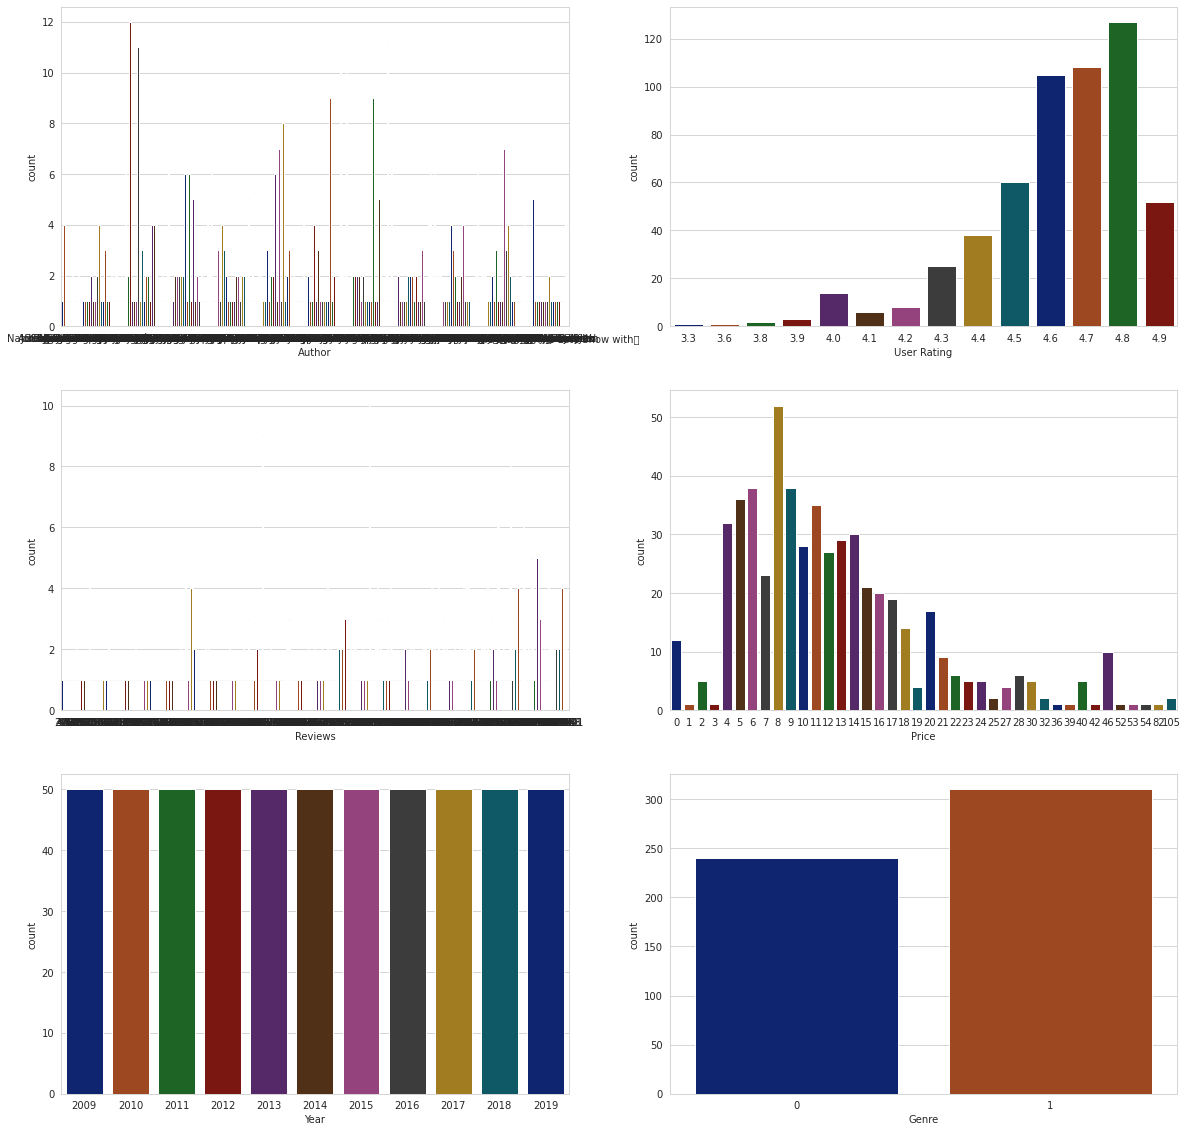

In [275]:
fig, axes = plt.subplots(3, 2, figsize = (20, 20))
for idx, val in enumerate(train_df.columns.to_list()):
    row_idx, col_idx = get_row_col_idx(idx)
    ax = axes[row_idx][col_idx]
    sns.countplot(x = val, data = train_df, ax = ax, palette="dark")

There are few observations from the above plots:
1. Firstly there are not much to say about authors.
2. User Ratings are skewed towards left.
3. For Reviews we can say that the count of review increases as they have greater value.
4. Price is skewed towards right anthe count of books having price 8 is highest.
5. Years are apparently distributed uniformly, we have equal number of books from each year.
6. Count of books having ficion genre are greater than non-fiction(valued as zero).

# Multivariate Analysis

<AxesSubplot:xlabel='Year', ylabel='count'>

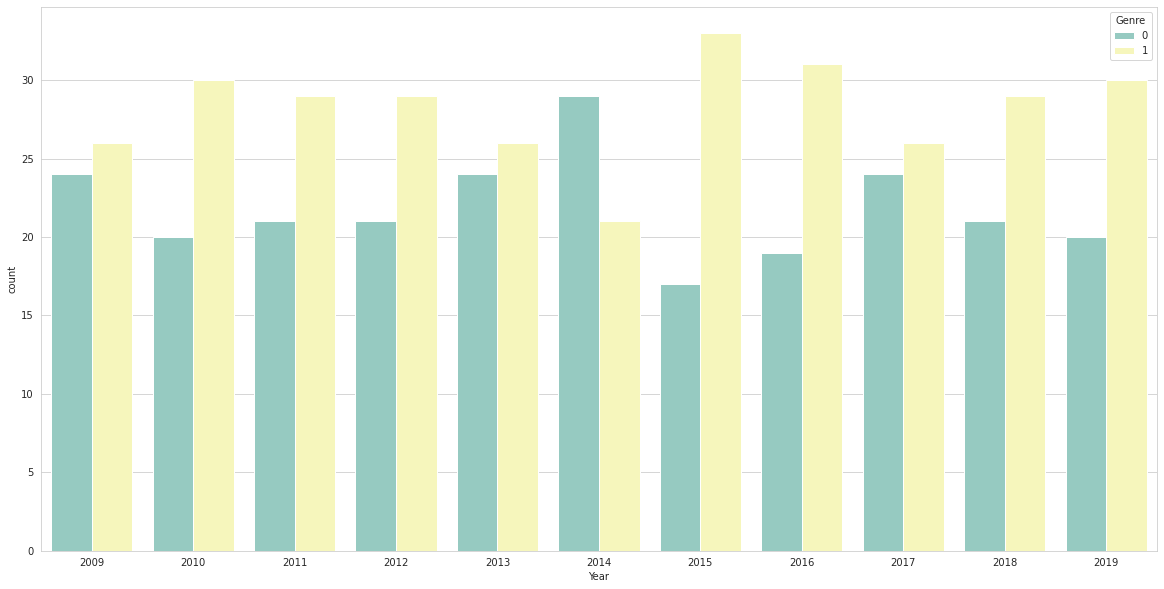

In [276]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = "Year", hue = "Genre", data = train_df, palette="Set3", ax = ax )

##### Let's see yearly what kind of books are included in the top ones, whether they are fiction or non fiction?
Except for the year 2014, every year had more fiction books in the top 50 rather than the non fiction books.

<AxesSubplot:xlabel='Year', ylabel='Price'>

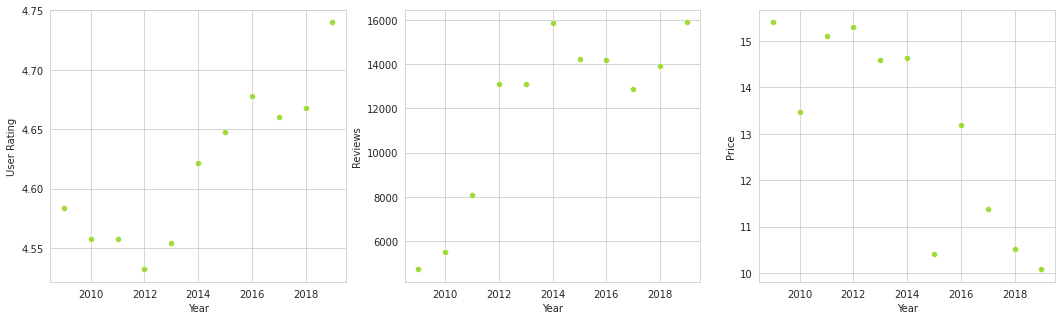

In [277]:
fig, ax = plt.subplots(1, 3, figsize = (18,5))
mean_of_user_rating = train_df.groupby("Year").agg({"User Rating": "mean"})
sns.scatterplot(x = "Year" , y = "User Rating", data = mean_of_user_rating, ax = ax[0])
mean_of_user_rating = train_df.groupby("Year").agg({"Reviews": "mean"})
sns.scatterplot(x = "Year" , y = "Reviews", data = mean_of_user_rating, ax = ax[1])
mean_of_user_rating = train_df.groupby("Year").agg({"Price": "mean"})
sns.scatterplot(x = "Year" , y = "Price", data = mean_of_user_rating, ax = ax[2])


From this plot we can certainly see that the user ratings have certainly increased over the years. There is a upward trend mostly. Except, for the year the user ratings have been the lowest for some reasons.
It can also be noticed that the average number of reviews have also increased after 2011 and after that they average number have always been higher than 13000 approximately.
Third plot follows a downward trend in a sense that the average price of the books that have been on top have reduced over time and was lowest in 2019

In [278]:
train_df.columns

Index(['Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

<AxesSubplot:xlabel='User Rating', ylabel='count'>

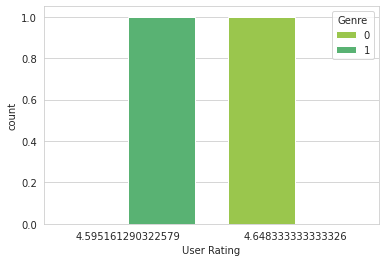

In [279]:
mean_of_user_rating_by_genres = train_df.groupby("Genre").agg({"User Rating": "mean"})
mean_of_user_rating_by_genres.reset_index(inplace=True)
sns.countplot( x = "User Rating", hue = "Genre", data = mean_of_user_rating_by_genres)

We can see in here that the User rating for fiction books are little bit lesser than for non fiction over the several years

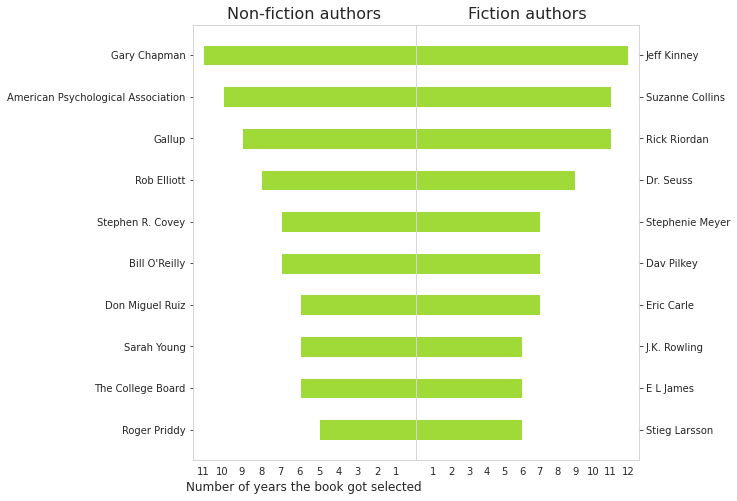

In [282]:
best_nf_books = train.groupby(['Author', 'Genre']).count().unstack()['Name']['Non Fiction'].sort_values(ascending=False)[:10]
best_f_books = train.groupby(['Author', 'Genre']).count().unstack()['Name']['Fiction'].sort_values(ascending=False)[:10]

fig,axes = plt.subplots(1,2,figsize=(8,8))
plt.subplots_adjust(wspace=0)

axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_left()
axes[0].grid(None)
axes[0].set_xticks(range(1,int(best_nf_books.values.max())+1))
axes[0].barh(y=best_nf_books.index,width=best_nf_books.values,height=0.5,tick_label=best_nf_books.index)
axes[0].set_title('Non-fiction authors',fontdict={'size':16})
axes[0].set_xlabel('Number of years the book got selected',fontsize=12)

axes[1].set_xticks(range(1,int(best_f_books.values.max())+1))
axes[1].invert_yaxis()
axes[1].yaxis.tick_right()
axes[1].grid(None)
axes[1].barh(y=best_f_books.index,width=best_f_books.values,height=0.5,tick_label=best_f_books.index)
axes[1].set_title('Fiction authors',fontdict={'size':16})

plt.show()